## Exploratory data analysis

**Exploratory data analysis** (EDA) is the first step to solve any Machine Learning problem. It consists of a process that seeks to analyze and investigate the available data sets and summarize their main characteristics, often using data visualization techniques. This analysis is carried out through a series of steps detailed below.

In this section we will delve into the concept by working with the [Titanic](https://www.kaggle.com/competitions/titanic) dataset.

## DAY 1

### Step 1: Problem statement and data collection

Before starting to analyze the dataset, we must understand, on the one hand, the problem or challenge we are trying to solve with this information and how suitable or useful it can be for us.

In this case, we want to analyze which people did or did not survive the sinking of the Titanic and, in successive phases, be able to train a Machine Learning model to answer the question: "What kind of people were most likely to survive?". Therefore, we find that the dataset we have available can help us to solve the question posed and we apply an EDA process to learn more about it in detail.

We will import the dataset to start working with it:

In [1]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Exploration and data cleaning

Once we have loaded the dataset, we must analyze it in its entirety, without disintegration of train and test, to obtain joint conclusions. Once we have the information loaded in a manageable data structure such as a Pandas DataFrame, we can start with the process.

Knowing the dimensions and data types of the object we are working with is vital. For this we need the `shape` attribute to obtain the dimensions of the object and the `info()` function to know the typology and the amount of non-null values:

In [2]:
# Obtain dimensions
total_data.shape

(1309, 12)

In [3]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Once we have obtained this information, it is important that we are able to draw conclusions, such as the following:

- There are a total of 836 rows (in this case, people) and 12 columns, among which we find the target or class to predict, `Survived`.
- The variable `Cabin` only has 295 instances with values, so it would contain more than 1000 null values. The variable `Age` also has null values, but in a much smaller number than the previous one. The rest of the variables always have a value.
- The data has 7 numerical characteristics and 5 categorical characteristics.

#### Eliminate duplicates

A very important point to take into account in this step is to eliminate those instances that could be duplicated in the dataset. This is crucial since, if left, the same point would have several representations, which is mathematically incoherent and incorrect. To do this, we have to be smart about looking for duplicates and know in advance if and where there are duplicates before eliminating them. In addition, we have to take into account that an instance can be repeated independently of the identifier it may have, so in this case we are interested in eliminating the `PassengerId` variable from the analysis, since it could be wrongly generated.

In [4]:
total_data.drop("PassengerId", axis = 1).duplicated().sum()

0

In this case, we did not find any duplicate values. In the case that we had found it, the next step would be to apply the `drop_duplicates()` function.

In [5]:
total_data = total_data.drop_duplicates(subset = total_data.columns.difference(['PassengerId']))
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We would again exclude the identification column, although we could repeat the analysis by including it to enrich the analysis:

In [6]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Eliminate irrelevant information

When we want to prepare the data to train a predictive model we must answer the following question: are all the features essential to make a prediction? Normally, that question is a resounding no. We have to try to be as objective as possible. We have to try to be as objective as possible and carry out this preliminary process before the feature selection phase. Therefore, here what we will try to do is a controlled elimination of those variables that we can be sure that the algorithm will not use in the predictive process, these are `PassengerId`, `Name`, `Ticket` and `Cabin`.

In [7]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Step 3: Analysis of univariate variables

A **univariate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

#### Analysis on categorical variables

A **categorical variable** is a type of variable that can take one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

To represent these types of variables we will use histograms. Before we start plotting, we must identify which ones are categorical, and this can be easily checked by analyzing the range of values. In this case, the categorical variables are `Survived`, `Sex`, `Pclass`, `Embarked`, `SibSp` and `Parch`:

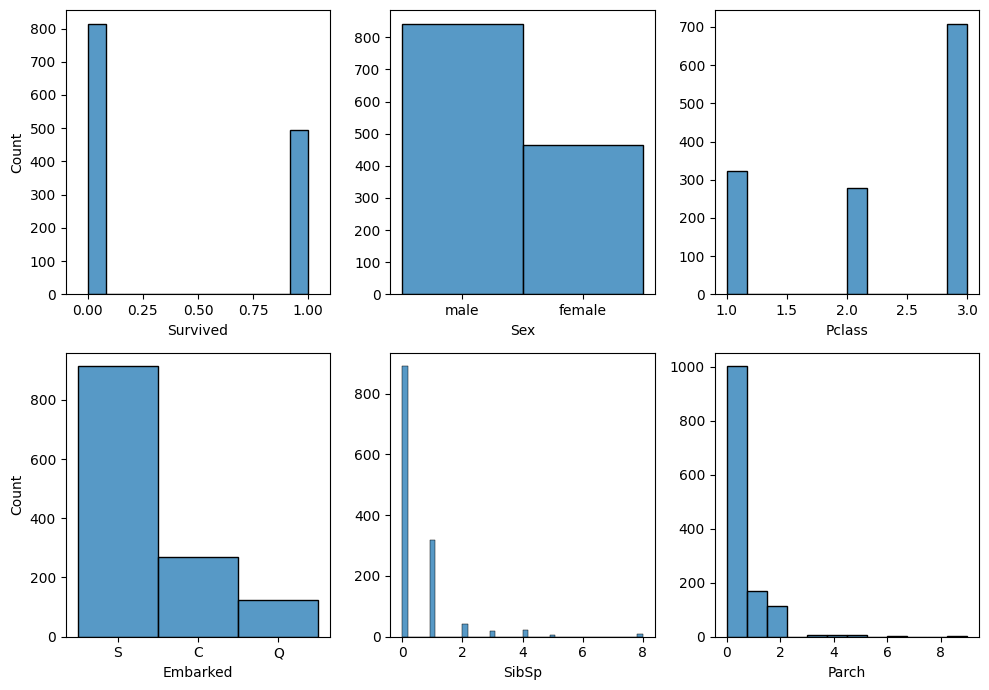

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

A histogram is a graphical representation of the distribution of a data set. It is also used to understand the frequency of the data. By looking at a histogram, we can understand if the data is skewed towards one extreme, if it is symmetrical, if it has many outliers, and so on. With the representation of each variable we can determine that:

- **Survived**: The number of people who did not survive outnumber those who did by more than 300.
- **Sex**: There were almost twice as many men as women on the Titanic.
- **Pclass**: The sum of passengers traveling in first and second class was almost identical to those traveling in third.
- **Embarked**: The majority of Titanic passengers embarked at Southampton (`S`) station.
- **SibSp**: More than 800 passengers traveled alone. The remainder with their partner or someone else from their family.
- **Parch**: Almost all passengers traveled without parents or children. A small portion did.

#### Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc) in an infinite range. A numerical categorical variable can also be a numerical variable (e.g. for further analysis, we can take the class `Survived` as numerical also to study relationships). They are usually represented using a histogram and a boxplot, displayed together. Before starting to plot, we must also identify which are the numerical ones, which are `Fare`, `Age` and `PassengerId`. However, the latter is meaningless, so we will plot the first two:

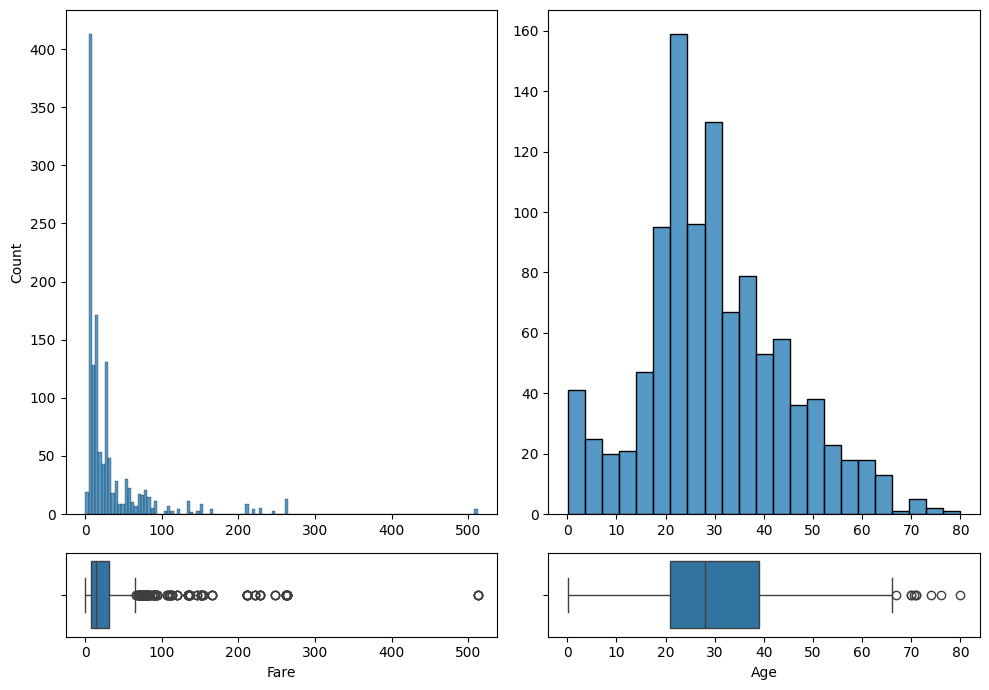

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The combination of the two previous graphs allows us to know the distribution and its statistical characteristics. From the resulting visualization we can see that both variables have outliers that are far from the standard distribution and that their distributions are slightly unsymmetric but close to a normal distribution; the first one totally skewed to the left, where the mean is lower than the mode and the other one with a lower tendency.

### Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable `Cabin` has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.

#### Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns.

##### Survived - (Face, Age)

We will use the variable `Survived` to start with the bivariate analysis because being a categorical variable but coded in numbers, it can be considered as numerical as well. We first analyze the class versus numeric characteristics:

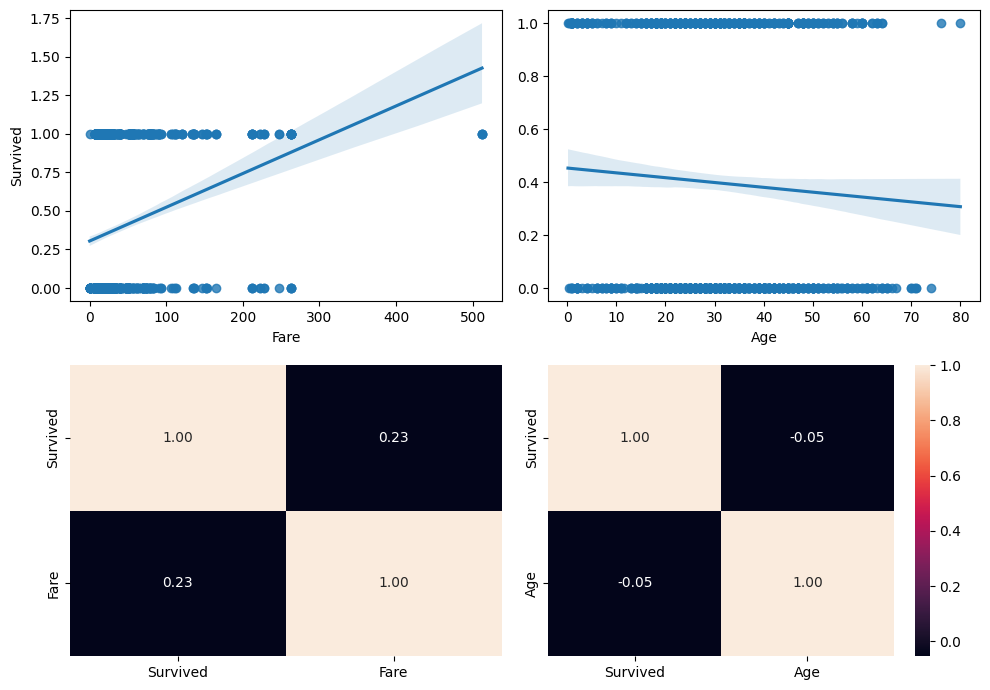

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "Fare", y = "Survived")
sns.heatmap(total_data[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
sns.heatmap(total_data[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

There is a direct relationship (although not very strong) between ticket price (`Fare`) and passenger survival. Thus, some passengers with a low fare were less likely to survive than those who purchased a ticket with a higher fare. There is also a negative linear relationship, weaker than the previous one between age (`Age`) and the target variable. This makes sense considering that children were one of the groups that had a preference in using the boats for survival.

In summary, despite there being some relationship with these characteristics versus the predictor, the significance is not very high, not being decisive factors on whether a passenger survived or not.

##### Face - Age

Next we can also relate both variables to determine their degree of affinity or correlation:

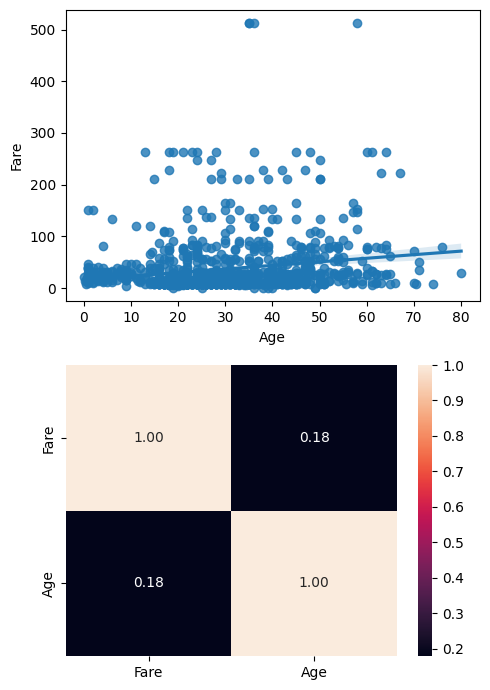

In [11]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Fare")
sns.heatmap(total_data[["Fare", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

It can be determined that there is not a very strong relationship between the two variables and that age has no impact on whether the ticket price is higher or not.

#### Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. Histograms and combinations are used to compare two numerical columns.

##### Survived - (Sex, Pclass, Embarked, SibSp, Parch)

First we analyze the class against the categorical features, one by one. Here there will be no combinations of several predictors and the class:

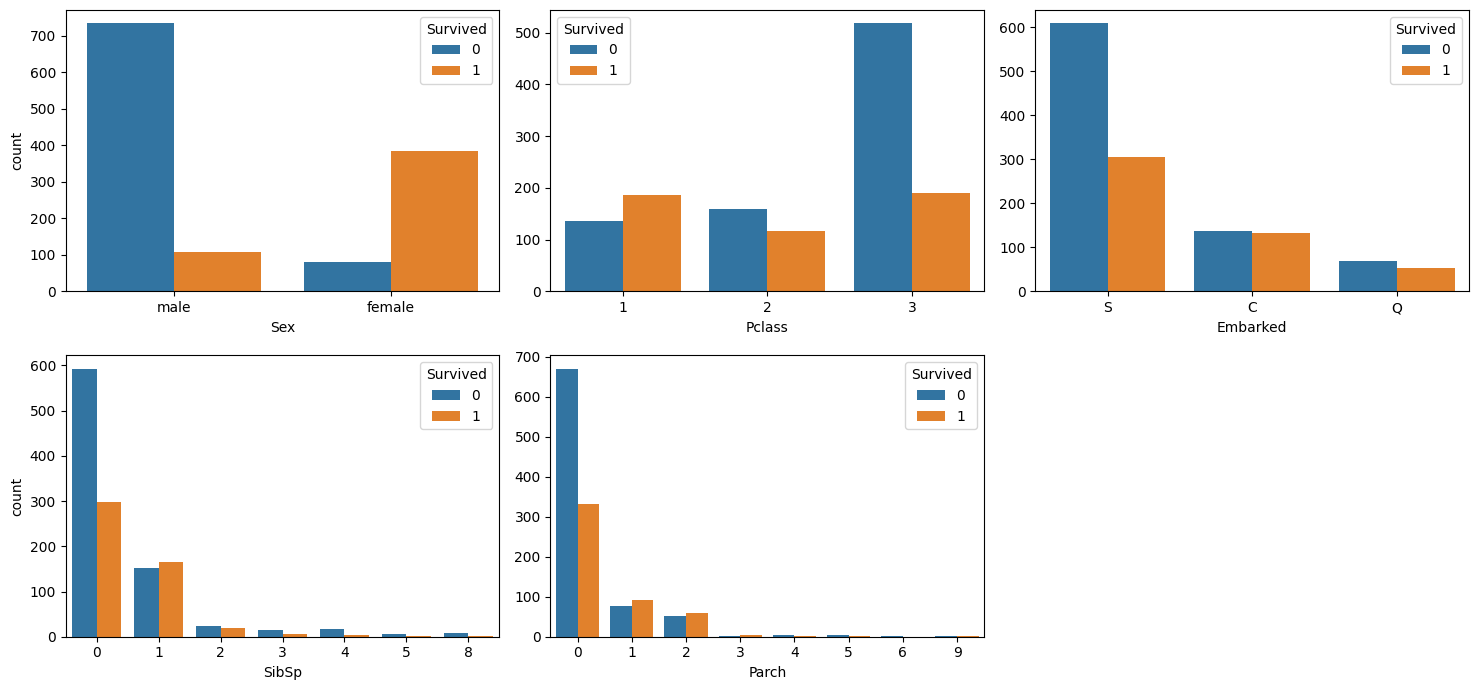

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

The following conclusions can be drawn from the above graph:

- With higher proportion women survived as opposed to men. This is because women had priority over men in the evacuation plans.
- People who traveled alone had more problems surviving than those who traveled accompanied.
- Those who traveled in a better class on the Titanic had a higher chance of survival.

##### Combinations of class with various predictors.

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis. These types of operations must be subjective and must combine related characteristics. For example, it would not make sense to perform an analysis between the class, the passenger's sex and the station where he/she boarded the Titanic, since there is no relationship between the passenger's sex and the station. However, the sex, class and sex of the passenger versus their survival could be an analysis worthy of study, among other casuistries presented below:

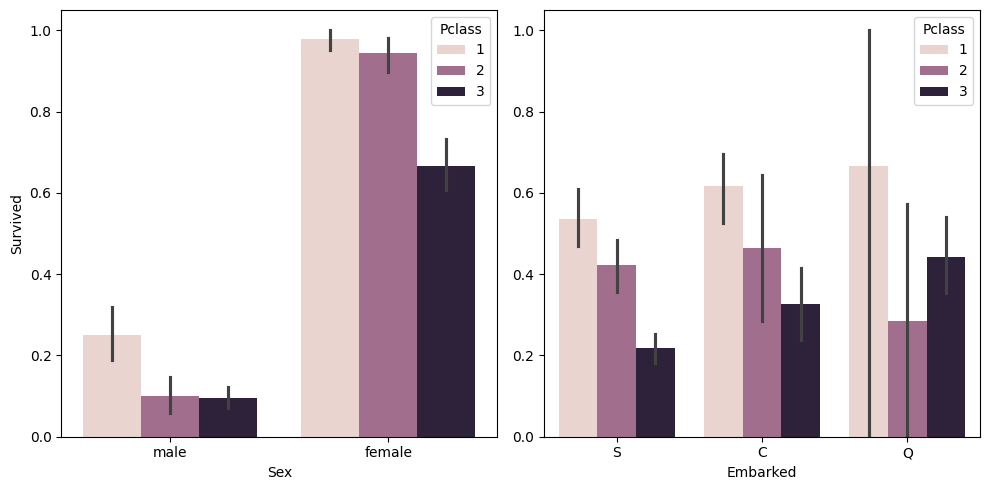

In [13]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()

From these analyses, it is clear that, regardless of the port of embarkation, women had a higher chance of survival regardless of the class in which they traveled, which reinforces the knowledge obtained earlier. Furthermore, on average, people who traveled in higher classes survived longer than those who did not.

##### Correlation analysis

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis. These types of operations must be subjective and must combine related characteristics. For example, it would not make sense to perform an analysis between the class, the passenger's sex and the station where he/she boarded the Titanic, since there is no relationship between the passenger's sex and the station. However, the sex, class and sex of the passenger versus their survival could be an analysis worthy of study, among other casuistries presented below:

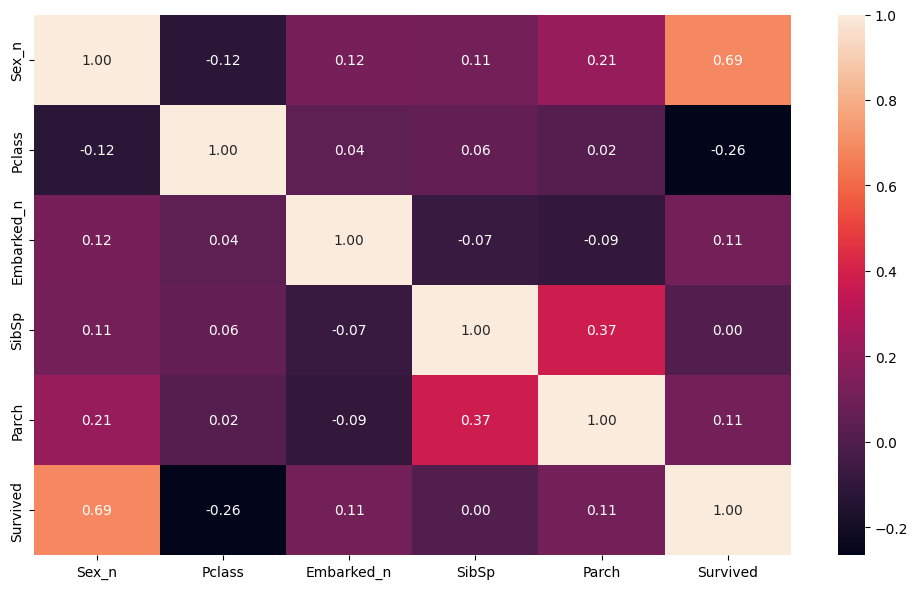

In [14]:
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

The correlation analysis shows a strong direct relationship between the sex (`Sex`) of the passenger and his or her survival, as we have seen in previous sections. In addition, there is a relationship between the number of passengers' companions (variables `SibSp` and `Parh`). The rest of the correlations are weak and not significant enough to be included in the analysis.

Finally, to close the multivariate study, it remains to analyze the relationship between the categorical and numerical variables.

#### Numerical-categorical analysis (complete)

This is the most detailed analysis we can carry out. To do this, we simply have to calculate the correlations between the variables, since this is the best indication of the relationships. Thus, once we have verified that there is a relationship, we can go deeper into the study. Another element that can be very helpful is to obtain the two-by-two relationships between all the data in the dataset. This is, in part, redundant because there are many things that we have already calculated before and so it is optional.

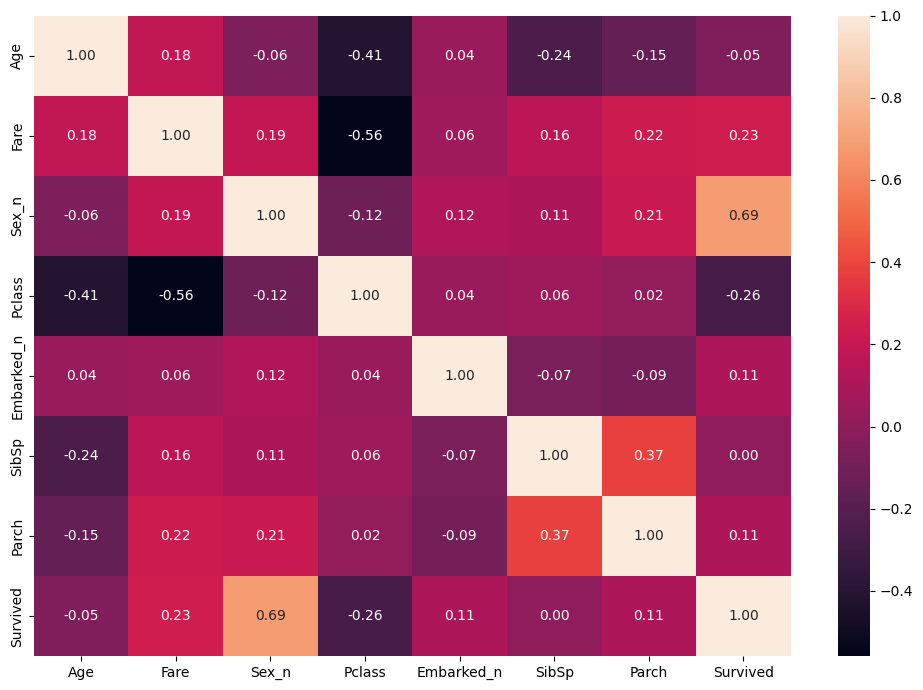

In [15]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

There is a strong negative relationship between class type (`Pclass`) and passenger age (`Age`) (those traveling in first class were very old) and between class and fare paid (`Fare`), which makes a lot of sense. The rest of the correlations remain the same as previously seen.

Having analyzed the correlation, let us analyze the two cases seen to corroborate the theory:

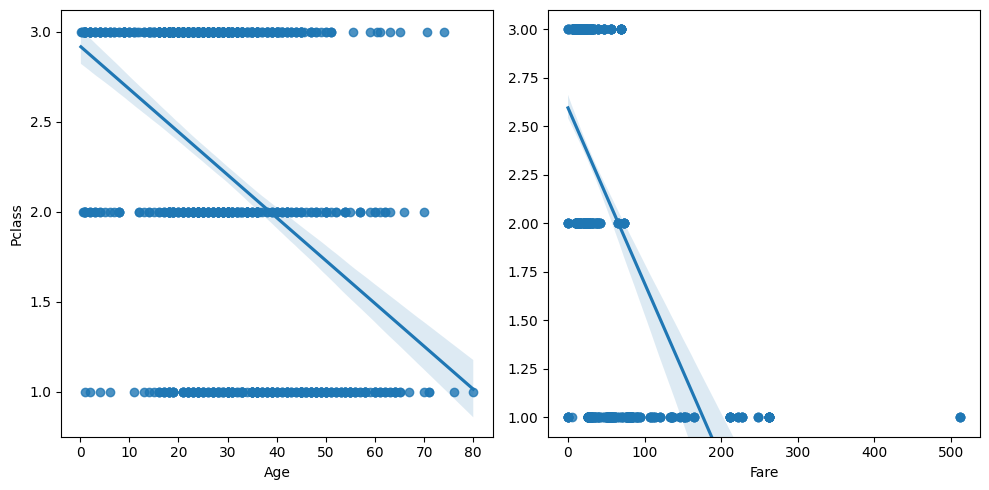

In [16]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = total_data, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

In the first graph we see that as age increases the presence of first class tickets becomes more noticeable, and as age decreases, third class tickets become more present, reinforcing the negative relationship between the observed variables. The second graph also reinforces what was observed, as better class tickets should be more expensive.

Once the correlation has been calculated, we can draw the `pairplot` (this is an optional step):

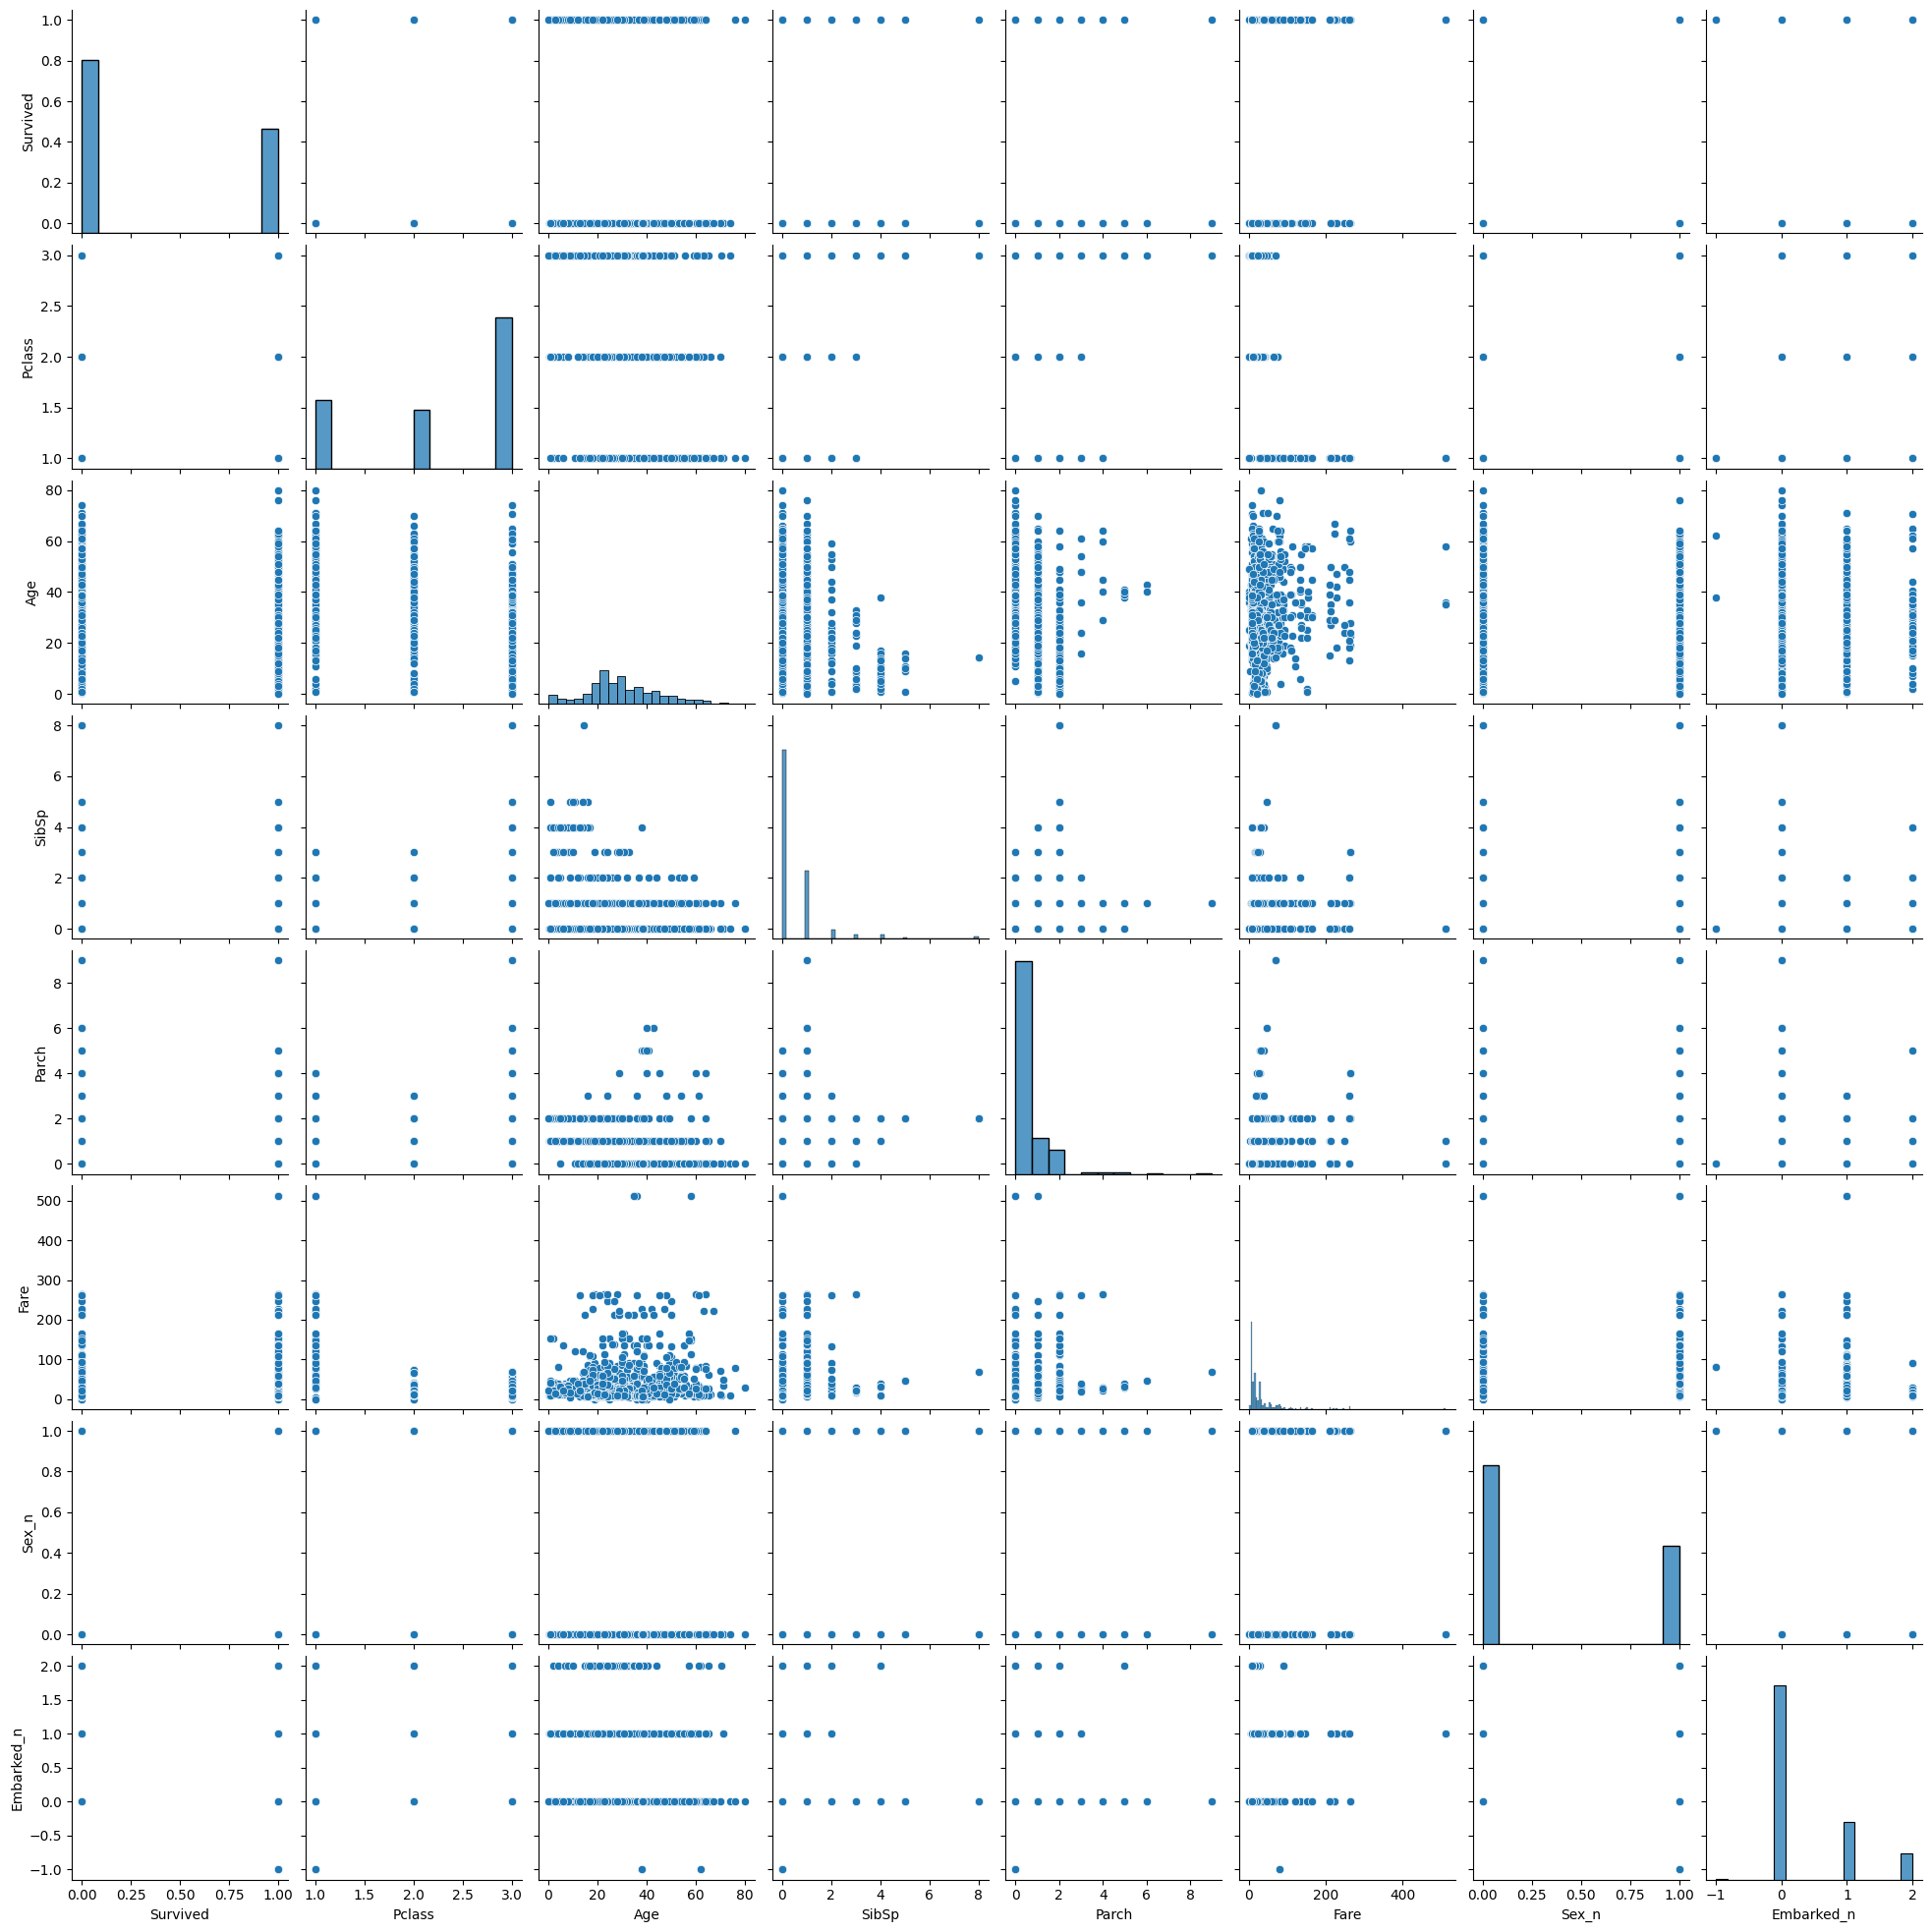

In [17]:
sns.pairplot(data = total_data)

## END OF DAY 1

Now, let's work and practice today's lesson to reinforce what we have learned!

## DAY 2

### Step 5: Feature engineering

**Feature engineering** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

In the previous steps we have started working with the data by eliminating duplicates, accounting for null values and even, to calculate correlations, transforming `Sex` and `Embarked` into numerical categories. Although this could have been done in this step as it is part of the feature engineering, it is usually done before analyzing the variables, separating this process into a previous one and the one we are going to see next.

#### Outlier analysis

An **outlier** is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

**Descriptive analysis** is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The `describe()` function of a DataFrame helps us to calculate in a very short time all these values.

In [18]:
total_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.355997,0.392666
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668,0.478997,0.655586
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000


While experience is an important component in analyzing the results in the table above, we can use certain rules to detect them, such as looking at the minimum and maximum value of a specific characteristic and comparing it to its 25% and 75% percentile. For example, everything looks normal except for the `Fare` column which has a mean of 32.20 but its 50% percentile is 14 and its maximum value is 512. We could say that 512 seems to be an outlier, but it could be a transcription error. It is also possible that the most expensive bill had that price. It would be useful to do some research and confirm or disprove that information.

Drawing box plots of the variables also gives us very powerful information about outliers that fall outside the confidence regions:

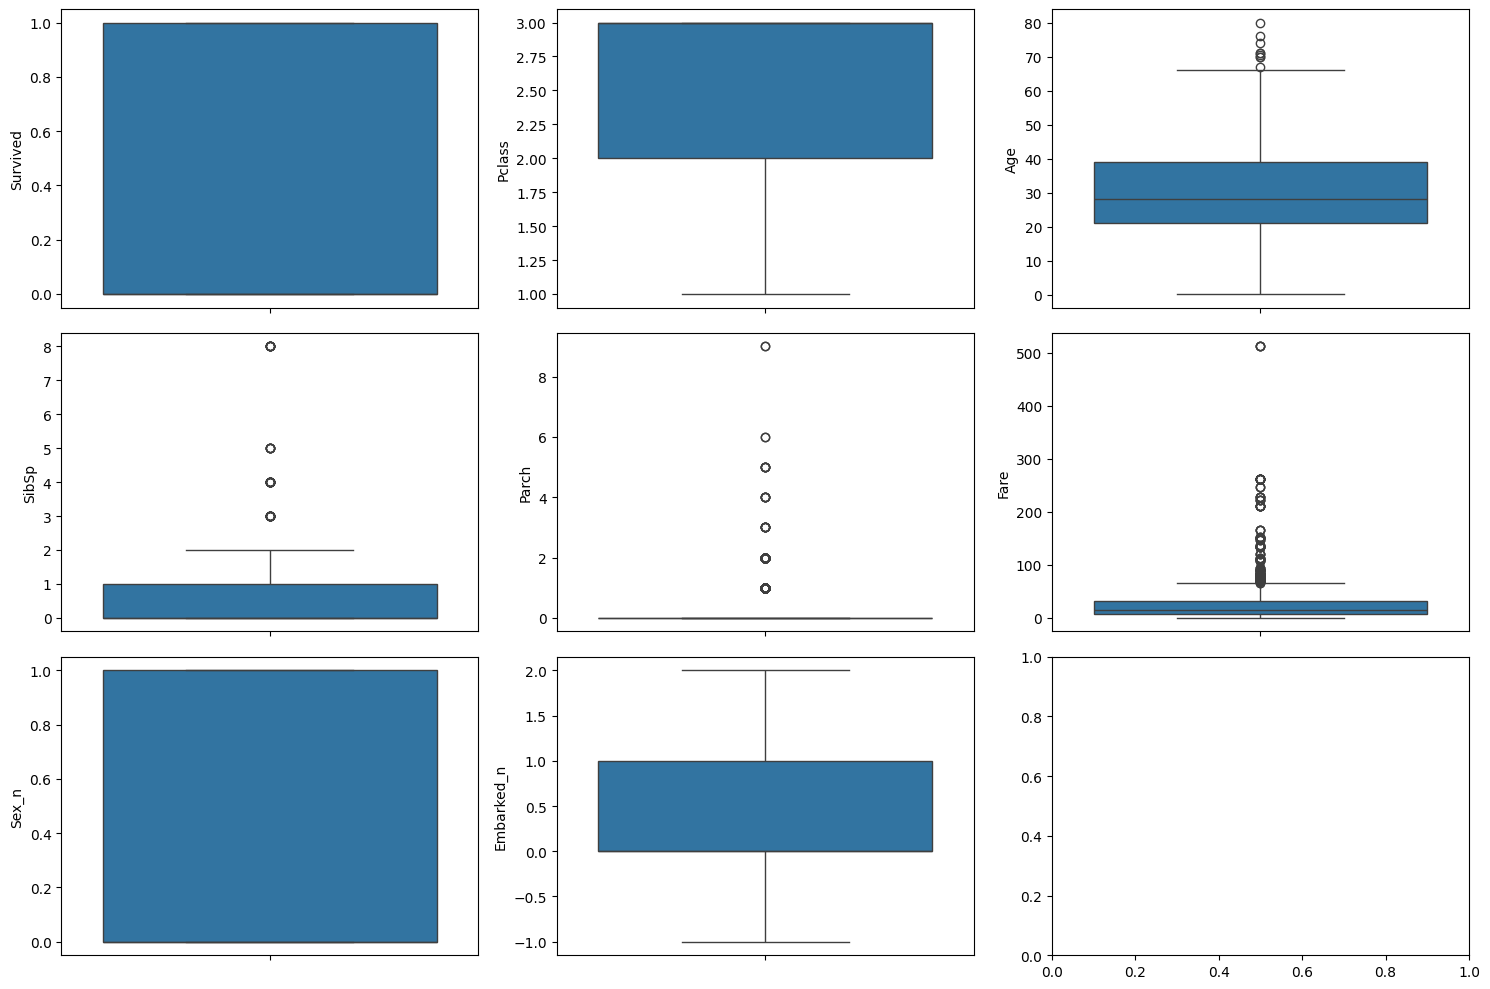

In [19]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

We can easily determine that the variables affected by outliers are `Age`, `SibSp`, `Parch` and `Fare`. In the above case about the cruise ticket (`Fare` column) it appears that the $512 ticket fare is not very common. We should set some upper and lower bounds to determine whether or not a data point should be considered an outlier.

To deal with them there are many techniques, and you can find more information [here](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.md), but which can be summarized in the following points:

- Maintain them. In certain Machine Learning problems, an outlier may bias the prediction towards one class or another (this is very common, for example, to detect risks). Therefore, it could be a policy that in certain cases makes sense. It is not normally used.
- Eliminate them. Those instances with outliers are removed from the dataset. However, if there are many outliers, this strategy may cause a large part of the available information to be lost.
- Replace them. If we do not want to remove entire instances due to the presence of outliers in one of their features, we can replace them by taking them into account as missing values and reusing the policy.

For example, if we want to apply the second point above in the case of the `Fare` column:

In [20]:
fare_stats = total_data["Fare"].describe()
fare_stats

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [21]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(fare_iqr, 2)}")

The upper and lower limits for finding outliers are 66.34 and -27.17, with an interquartile range of 23.38


Based on these results, we should eliminate the records of passengers whose ticket amount exceeds $65. However, our criteria is very important here and, according to the prices we saw in the box plot, the most extreme values are above 300. Let's see how many values represent that extreme value of 512:

In [22]:
total_data[total_data["Fare"] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1
1234,1,1,female,58.0,0,1,512.3292,C,1,1


In this case we see that all of them survived, perhaps there is indeed a real impact on the very high ticket price and the final survival. Therefore, added to the univariate analysis above, there is an implication between the ticket price and the final survival outcome, so we decide that **we keep the outliers**.

#### Missing value analysis

A **missing value** is a space that has no value assigned to it in the observation of a specific variable. These types of values are quite common and can arise for many reasons. For example, there could be an error in data collection, someone may have refused to answer a question in a survey, or it could simply be that certain information is not available or not applicable.

The `isnull()` function is a powerful tool for obtaining this information:

In [23]:
total_data.isnull().sum().sort_values(ascending=False)

Age           263
Embarked        2
Fare            1
Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Sex_n           0
Embarked_n      0
dtype: int64

In addition, we can divide that result by the length of our DataFrame (number of rows) to get the percentage of missing values in each column. Missing values are usually represented as `Nan`, `Null` or `None` in the dataset:

In [24]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Age           0.200917
Embarked      0.001528
Fare          0.000764
Survived      0.000000
Pclass        0.000000
Sex           0.000000
SibSp         0.000000
Parch         0.000000
Sex_n         0.000000
Embarked_n    0.000000
dtype: float64

To deal with them there are many techniques, and you can find more information [here](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-missing-values.ipynb), but they can be summarized in the following points:

- Eliminate them. Similar to the previous case of outliers.
- Numerical imputation: To fill in the missing values in a numerical variable, normally the procedure is to use the statistical values of the sample. The most common is to import it using the mean, mode or median of that characteristic.
- Categorical imputation: When the column is categorical, it is usually filled by taking the element of the highest or best category.

For cases with missing data observed in the `Age`, `Embarked` and `Fare` variables, we will use numerical imputation through the `fillna()` function. In this case we are going to use some of the different options that can be chosen to fill values:

In [25]:
total_data["Age"].fillna(total_data["Age"].median(), inplace = True)
total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True)
total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True)

total_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_n         0
Embarked_n    0
dtype: int64

We see how the values have been correctly matched and there are no more missing values.

#### Inference of new features

Another typical use in this engineering is to obtain new features by "merging" two or more existing ones. For example, in this use case, that of the Titanic analysis, there are two variables representing the companions of a passenger. On the one hand, `SibSp` counts the number of siblings accompanying the passenger (including spouse, if applicable) and, on the other hand, `Parch` counts the number of companions who were parents and children. By joining these two variables and adding them together, we can obtain a third one, which informs us about the companions of a given passenger, without distinguishing between the links they may have.

In [26]:
total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]

total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n,FamMembers
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0


In this way we can simplify the number of variables and draw new relationships with the predictor class.

#### Feature scaling

**Feature scaling** is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other. Scaling usually involves normalization, which is the process of changing the values so that they have a mean of 0 and a standard deviation of 1. Another common technique is min-max scaling, which transforms the data so that all values are between 0 and 1.

Before scaling the values, we must conveniently divide the set into train and test, which will prevent the training data from being contaminated by the test set data. The scaler (*scaler*) will be in charge of scaling the variables according to the training set.

In [27]:
from sklearn.model_selection import train_test_split

num_variables = ["Pclass", "Age", "Fare", "Sex_n", "Embarked_n", "FamMembers"]

# We divide the dataset into training and test samples
X = total_data.drop("Survived", axis = 1)[num_variables]
y = total_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,2,57.0,10.500,1,0,0
543,2,32.0,26.000,0,0,1
289,3,22.0,7.750,1,2,0
10,3,4.0,16.700,1,0,2
147,3,9.0,34.375,1,0,4


> NOTE: Only predictor variables should be scaled, never the target.

We will detail below how we can apply each of these, but remember that it depends very much on the model we will want to train:

##### Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,-0.331309,2.160657,-0.467908,1.355507,-0.586065,-0.555242
543,-0.331309,0.190910,-0.150474,-0.737732,-0.586065,0.062546
289,0.852582,-0.596989,-0.524227,1.355507,2.536631,-0.555242
10,0.852582,-2.015207,-0.340935,1.355507,-0.586065,0.680333
147,0.852582,-1.621257,0.021043,1.355507,-0.586065,1.915909


##### Min-Max Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,FamMembers
772,0.5,0.749440,0.020495,1.0,0.333333,0.0
543,0.5,0.419755,0.050749,0.0,0.333333,0.1
289,1.0,0.287881,0.015127,1.0,1.000000,0.0
10,1.0,0.050508,0.032596,1.0,0.333333,0.2
147,1.0,0.116445,0.067096,1.0,0.333333,0.4


> NOTE: In this step we must make sure that all our variables are numeric, and, if not, as we have seen in the steps at the beginning, we should transform them, as we have done with `Sex` and `Embarked`.

## END OF DAY 2

Now, let's work and practice today's lesson to reinforce what we have learned!

## DAY 3

### Step 6: Feature selection

The **feature selection** is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest.

There are several reasons to include it in our exploratory analysis:

1. to simplify the model so that it is easier to understand and interpret.
To reduce the training time of the model.
3. Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.
4. Improve model performance by removing irrelevant features.

In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models and more information is available [here](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.md).

The `sklearn` library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is `SelectKBest`. This function selects the `k` best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square:

In [30]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,2.0,10.500,1.0,0.0,0.0
1,2.0,26.000,0.0,0.0,1.0
2,3.0,7.750,1.0,2.0,0.0
3,3.0,16.700,1.0,0.0,2.0
4,3.0,34.375,1.0,0.0,4.0


In [31]:
X_test_sel.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,3.0,8.050,0.0,0.0,0.0
1,1.0,26.550,0.0,0.0,0.0
2,3.0,7.775,0.0,0.0,0.0
3,2.0,13.000,0.0,0.0,0.0
4,3.0,7.750,1.0,2.0,0.0


In [32]:
X_train_sel["Survived"] = list(y_train)
X_test_sel["Survived"] = list(y_test)

In [33]:
X_train_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_test.csv", index=False)

Feature selection, like model training in general, should be performed only on the training data set and not on the whole. If we were to perform it on the entire set, we could introduce a bias known as **data leakage**, which occurs when information from the test set is used to make decisions during training, which can lead to an overly optimistic estimate of model performance.

Therefore, the best practice is to split the data into two sets: training and test prior to feature selection, which will be performed only on the training data and then applied to both. In this way, we ensure that this process and the model are being validated fairly.

In this case, using Chi-square feature selection, the most important features are `Pclass`, `Sex`, `Parch`, `Fare` and `Embarked`.

## END OF DAY 3

We now know how to carry out an in-depth study in detail to fully understand our data set. Let's recall the steps we have to follow to carry it out:

- Step 1: Problem statement and data collection
- Step 2: Exploration and data cleaning
- Step 3: Analysis of univariate variables
- Step 4: Analysis of multivariate variables
- Step 5: Feature engineering
- Step 6: Feature selection

After the implementation and adoption of these steps, we will be ready to train the model.